
## 1. Frame the problem and getting the big picture
Get the fare of cab from the company(Uber/Lyft) and distance travelled by cab.

this effected by distance, company by which cab and which type of cab is booked
and may be the source and the destination place

index

time_stamp - epoch time (in seconds) when the cab was booked

cab_provider - company (Uber/Lyft)

source - the starting point of the cab ride

destination - the destination of the cab ride

distance - the distance between source and destination

surge_multiplier - multiplier by which price increased

cab_type - the type of cab (Uber Pool, Uber XL, etc. )

fare - cab fare in USD (Target Attribute)

In [1]:
import math
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 2. Get the data

In [2]:
df = pd.read_csv("/content/TRAIN.csv")

## 3.Explore the data to get the insight - feature engineering by krish naik

In [3]:
df.shape

(100000, 9)

In [4]:
df.iloc[:,:]

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,1543203646318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,1543203646319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,1543203646320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,1543203646320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0
...,...,...,...,...,...,...,...,...,...
99995,99995,1543364124049,Uber,North End,West End,1.16,1.0,UberXL,12.0
99996,99996,1543364124049,Uber,North End,West End,1.16,1.0,Black SUV,26.0
99997,99997,1543364124049,Uber,North End,West End,1.16,1.0,Black,16.0
99998,99998,1543364124049,Uber,North End,West End,1.16,1.0,UberX,7.0


In [5]:
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='ms')

In [6]:
df.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare
0,0,2018-11-26 03:40:46.318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0
1,1,2018-11-26 03:40:46.319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5
2,2,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5
3,3,2018-11-26 03:40:46.320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5
4,4,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0


In [7]:
df.describe()

,index,distance,surge_multiplier,fare
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,2.188783,1.014945,16.571013
std,28867.657797,1.142837,0.095462,9.333901
min,0.000000,0.020000,1.000000,2.500000
25%,24999.750000,1.280000,1.000000,9.000000
50%,49999.500000,2.150000,1.000000,13.500000
75%,74999.250000,2.930000,1.000000,22.500000
max,99999.000000,7.500000,3.000000,92.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   index             100000 non-null  int64         
 1   time_stamp        100000 non-null  datetime64[ns]
 2   cab_provider      100000 non-null  object        
 3   source            100000 non-null  object        
 4   destination       100000 non-null  object        
 5   distance          100000 non-null  float64       
 6   surge_multiplier  100000 non-null  float64       
 7   cab_type          100000 non-null  object        
 8   fare              100000 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.9+ MB


In [9]:
df["day"] = pd.to_datetime(df.time_stamp, format="%Y-%m-%d").dt.day
df["hour"] = pd.to_datetime(df.time_stamp, format="%Y-%m-%d").dt.hour
df["min"] = pd.to_datetime(df.time_stamp, format="%Y-%m-%d").dt.minute
df["sec"] = pd.to_datetime(df.time_stamp, format="%Y-%m-%d").dt.second

In [10]:
df.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,sec
0,0,2018-11-26 03:40:46.318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,26,3,40,46
1,1,2018-11-26 03:40:46.319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,26,3,40,46
2,2,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,26,3,40,46
3,3,2018-11-26 03:40:46.320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,26,3,40,46
4,4,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,26,3,40,46


In [11]:
corr_matrix_ = df.corr()
corr_matrix_['fare'].sort_values(ascending=False)

fare                1.000000
distance            0.345961
surge_multiplier    0.237346
index               0.003182
hour                0.002103
day                 0.002002
sec                -0.000932
min                -0.009169
Name: fare, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff8e96a54d0>,
      dtype=object)

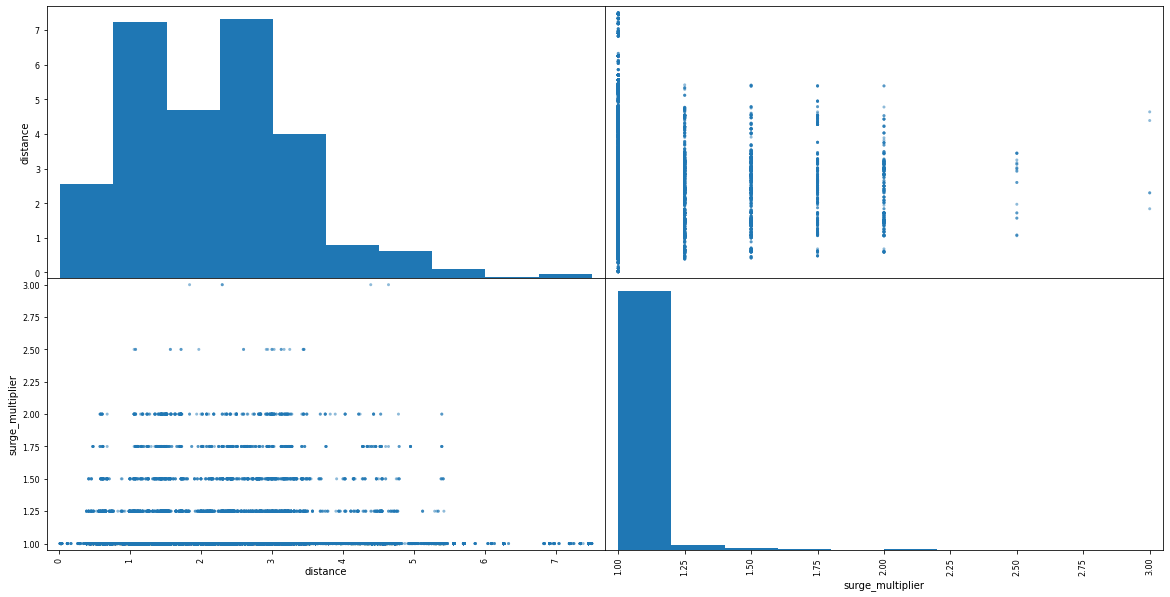

In [12]:
from pandas.plotting import scatter_matrix
attributes = ["distance","surge_multiplier","source","destination"]
scatter_matrix(df[attributes], figsize = (20,10))

In [13]:
# a = ["source","surge_multiplier","cab_type","destination"]
# pd.plotting.scatter_matrix(df, alpha=0.5,figsize=(50,50))

In [14]:
corr_matrix_ = df.corr()
corr_matrix_['fare'].sort_values(ascending=False)

fare                1.000000
distance            0.345961
surge_multiplier    0.237346
index               0.003182
hour                0.002103
day                 0.002002
sec                -0.000932
min                -0.009169
Name: fare, dtype: float64

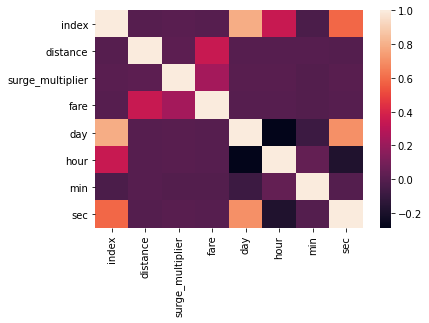

In [15]:
sns.heatmap(corr_matrix_,robust=0)

### there can be relation between destination and source 
### Fare can be related to time of cab booked

In [16]:
df

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,sec
0,0,2018-11-26 03:40:46.318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,26,3,40,46
1,1,2018-11-26 03:40:46.319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,26,3,40,46
2,2,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,26,3,40,46
3,3,2018-11-26 03:40:46.320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,26,3,40,46
4,4,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,26,3,40,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2018-11-28 00:15:24.049,Uber,North End,West End,1.16,1.0,UberXL,12.0,28,0,15,24
99996,99996,2018-11-28 00:15:24.049,Uber,North End,West End,1.16,1.0,Black SUV,26.0,28,0,15,24
99997,99997,2018-11-28 00:15:24.049,Uber,North End,West End,1.16,1.0,Black,16.0,28,0,15,24
99998,99998,2018-11-28 00:15:24.049,Uber,North End,West End,1.16,1.0,UberX,7.0,28,0,15,24


In [17]:
cab_provider = pd.get_dummies(df["cab_provider"],drop_first=True)
source = pd.get_dummies(df["source"],drop_first=True)
destination = pd.get_dummies(df["destination"],drop_first=True)
cab_type = pd.get_dummies(df["cab_type"],drop_first=True)
df.drop(["cab_provider","source","destination","cab_type"], axis=1,inplace=True)

In [18]:
df

,index,time_stamp,distance,surge_multiplier,fare,day,hour,min,sec
0,0,2018-11-26 03:40:46.318,3.03,1.0,34.0,26,3,40,46
1,1,2018-11-26 03:40:46.319,1.30,1.0,18.5,26,3,40,46
2,2,2018-11-26 03:40:46.320,2.71,1.0,19.5,26,3,40,46
3,3,2018-11-26 03:40:46.320,2.43,1.0,10.5,26,3,40,46
4,4,2018-11-26 03:40:46.320,2.71,1.0,32.0,26,3,40,46
...,...,...,...,...,...,...,...,...,...
99995,99995,2018-11-28 00:15:24.049,1.16,1.0,12.0,28,0,15,24
99996,99996,2018-11-28 00:15:24.049,1.16,1.0,26.0,28,0,15,24
99997,99997,2018-11-28 00:15:24.049,1.16,1.0,16.0,28,0,15,24
99998,99998,2018-11-28 00:15:24.049,1.16,1.0,7.0,28,0,15,24


In [19]:
df =pd.concat([df,cab_provider,source,destination,cab_type],axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 43 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   index                    100000 non-null  int64         
 1   time_stamp               100000 non-null  datetime64[ns]
 2   distance                 100000 non-null  float64       
 3   surge_multiplier         100000 non-null  float64       
 4   fare                     100000 non-null  float64       
 5   day                      100000 non-null  int64         
 6   hour                     100000 non-null  int64         
 7   min                      100000 non-null  int64         
 8   sec                      100000 non-null  int64         
 9   Uber                     100000 non-null  uint8         
 10  Beacon Hill              100000 non-null  uint8         
 11  Boston University        100000 non-null  uint8         
 12  Fenway           

In [21]:
df.drop('time_stamp',axis=1,inplace= True)

In [33]:
X_poly.shape

(100000, 903)

# Prepare the data

In [39]:
 from sklearn.model_selection import train_test_split
 X_train,X_testcv,Y_train,Y_testcv = train_test_split(df.drop('fare',axis=1), df['fare'], test_size=0.30, random_state=42)
 print(f"Rows in train set: {len(X_train)}\nRows in test set: {len(X_testcv)}\n")

Rows in train set: 70000
Rows in test set: 30000



In [40]:
df.drop('fare',axis=1).shape
df["fare"].shape

(100000,)

In [41]:
X_cv,X_test,Y_cv,Y_test = train_test_split(X_testcv, Y_testcv, test_size=0.50, random_state=42)
print(f"Rows in cross validation set: {len(X_cv)}\nRows in test set: {len(X_test)}\n")

Rows in cross validation set: 15000
Rows in test set: 15000



In [42]:
Y_train.describe()

count    70000.000000
mean        16.587376
std          9.338233
min          2.500000
25%          9.000000
50%         13.500000
75%         22.500000
max         92.000000
Name: fare, dtype: float64

In [43]:
Y_cv.describe()

count    15000.000000
mean        16.484333
std          9.323432
min          2.500000
25%          9.000000
50%         13.500000
75%         22.500000
max         80.500000
Name: fare, dtype: float64

In [44]:
Y_test.describe()

count    15000.000000
mean        16.581333
std          9.324281
min          2.500000
25%          9.000000
50%         14.000000
75%         22.500000
max         80.000000
Name: fare, dtype: float64

In [45]:
# X_train.drop('time_stamp',axis=1,inplace= True)
# X_cv.drop('time_stamp',axis=1,inplace= True)
# X_test.drop('time_stamp',axis=1,inplace= True)

In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    70000 non-null  int64  
 1   distance                 70000 non-null  float64
 2   surge_multiplier         70000 non-null  float64
 3   day                      70000 non-null  int64  
 4   hour                     70000 non-null  int64  
 5   min                      70000 non-null  int64  
 6   sec                      70000 non-null  int64  
 7   Uber                     70000 non-null  uint8  
 8   Beacon Hill              70000 non-null  uint8  
 9   Boston University        70000 non-null  uint8  
 10  Fenway                   70000 non-null  uint8  
 11  Financial District       70000 non-null  uint8  
 12  Haymarket Square         70000 non-null  uint8  
 13  North End                70000 non-null  uint8  
 14  North Station     

In [47]:
# X_train.iloc[:,4:38] = X_train.iloc[:,4:38].astype('int64')

In [48]:
# X_test.iloc[:,4:38] = X_test.iloc[:,4:38].astype('int64')

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 76513 to 15795
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   index                    70000 non-null  int64  
 1   distance                 70000 non-null  float64
 2   surge_multiplier         70000 non-null  float64
 3   day                      70000 non-null  int64  
 4   hour                     70000 non-null  int64  
 5   min                      70000 non-null  int64  
 6   sec                      70000 non-null  int64  
 7   Uber                     70000 non-null  uint8  
 8   Beacon Hill              70000 non-null  uint8  
 9   Boston University        70000 non-null  uint8  
 10  Fenway                   70000 non-null  uint8  
 11  Financial District       70000 non-null  uint8  
 12  Haymarket Square         70000 non-null  uint8  
 13  North End                70000 non-null  uint8  
 14  North Station     

# Select model

we are using linear model and tuning on basis of polynomial degree

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression() #5.792384999131107
model.fit(X_train,Y_train)
#Y_pred=model.predict(X_cv)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
model.score(X_cv,Y_cv)

0.9272096510841419

In [53]:
model.score(X_test,Y_test)

0.9314794660020524

# Fine tuning model

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
#X_poly = PolynomialFeatures(degree=2).fit_transform(X_train)

In [56]:
score=[]
#polynomial_features= 
for i in range(1,3):
    X_poly = PolynomialFeatures(degree=i).fit_transform(X_train)
    model.fit(X_poly,Y_train)
    score.append(model.score(X_poly,Y_train))    

In [57]:
poly = PolynomialFeatures(2)
print(poly.fit_transform(X_train).shape)
print(model.coef_.shape) # weights
print(model.intercept_) #bias

(70000, 903)
(903,)
19385.01690304988


In [58]:
score

[0.9277373567183143, 0.9648105990075279]

([<matplotlib.axis.YTick at 0x7ff8ddc11610>,
 <a list of 2 Text major ticklabel objects>)

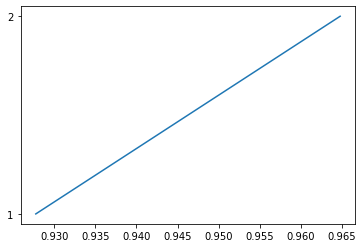

In [59]:
plt.plot(score,[1,2])
plt.yticks([1,2])

Reshaping to (70000,) to (70000,1)

In [60]:
Y_train =Y_train.values
Y_train = Y_train.reshape((70000,1))

In [61]:
X_poly.shape
Y_train.shape

(70000, 1)

In [62]:
model.fit(X_poly,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
model.score(X_poly,Y_train)

0.9648105990075279

In [64]:
(X_train.shape
X_poly.shape
X_cv .shape

SyntaxError: ignored

In [65]:
X_poly_cv = PolynomialFeatures(degree=2).fit_transform(X_cv)
X_poly_test = PolynomialFeatures(degree=2).fit_transform(X_test)

In [66]:
model.score(X_poly_cv,Y_cv)

0.9648628032902702

In [74]:
model.predict(X_poly_cv)

array([[ 8.84446646],
       [24.91858294],
       [ 7.13471475],
       ...,
       [13.58520768],
       [ 7.01022969],
       [26.7627898 ]])

In [75]:
Y_cv

3929     13.0
66365    25.0
9267      7.5
23724    28.0
77309    10.5
         ... 
92202     8.5
69141    13.0
97106    12.0
478       7.0
33121    27.5
Name: fare, Length: 15000, dtype: float64

In [67]:
model.score(X_poly_test,Y_test)

0.9653407076377107

## testing

In [ ]:
test = pd.read_csv("TEST.csv")

In [ ]:
test

In [ ]:
cab_provider = pd.get_dummies(test["cab_provider"],drop_first=True)
source = pd.get_dummies(test["source"],drop_first=True)
destination = pd.get_dummies(test["destination"],drop_first=True)
cab_type = pd.get_dummies(test["cab_type"],drop_first=True)

In [ ]:
test.drop(["cab_provider","source","destination","cab_type"], axis=1,inplace=True)
test =pd.concat([test,cab_provider,source,destination,cab_type],axis=1)

In [ ]:
test["day"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.day
test["hour"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.hour
test["min"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.minute
test["sec"] = pd.to_datetime(test.time_stamp, format="%Y-%m-%d").dt.second

In [ ]:
df.head()

,index,time_stamp,cab_provider,source,destination,distance,surge_multiplier,cab_type,fare,day,hour,min,sec
0,0,2018-11-26 03:40:46.318,Lyft,Boston University,Theatre District,3.03,1.0,Lux Black XL,34.0,26,3,40,46
1,1,2018-11-26 03:40:46.319,Uber,South Station,Theatre District,1.30,1.0,Black,18.5,26,3,40,46
2,2,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberX,19.5,26,3,40,46
3,3,2018-11-26 03:40:46.320,Lyft,Northeastern University,Beacon Hill,2.43,1.0,Lyft,10.5,26,3,40,46
4,4,2018-11-26 03:40:46.320,Uber,Theatre District,Fenway,2.71,1.0,UberXL,32.0,26,3,40,46


In [ ]:
test.drop("time_stamp",axis=1,inplace=True)

In [ ]:
test.info()

In [ ]:
a=model.predict(test)

# Output

In [ ]:
output = pd.DataFrame(a)

In [ ]:
output.columns=['fare']

In [ ]:
output = pd.concat([df.iloc[:25000,0],output],axis=1)

In [ ]:
output = output.set_index('index')

In [ ]:
output.info()

In [ ]:
output.to_csv('output.csv')